In [661]:
import pandas as pd
import matplotlib.pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose


In [662]:
data = pd.read_csv('/Users/mstee/Documents/School/projectwork/data/avg_daily_temp_curated.csv')

In [663]:
data.head()

,Datum,Kvalitet,Snittemperatur,Month
0,1961-01-01,G,1.07,1961-01
1,1961-01-02,G,2.27,1961-01
2,1961-01-03,G,2.27,1961-01
3,1961-01-04,G,2.53,1961-01
4,1961-01-05,G,2.13,1961-01


Change variable types 

In [664]:
print(data.dtypes)

Datum              object
Kvalitet           object
Snittemperatur    float64
Month              object
dtype: object


In [665]:
data['Datum'] = pd.to_datetime(data['Datum'])
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data['Kvalitet'] = data['Kvalitet'].astype(str)



In [666]:
print(data.dtypes)

Datum             datetime64[ns]
Kvalitet                  object
Snittemperatur           float64
Month             datetime64[ns]
dtype: object


EDA 

In [635]:
print(data['Snittemperatur'].describe())

count    19914.000000
mean         8.608544
std          7.337632
min        -22.220000
25%          3.172500
50%          8.500000
75%         14.710000
max         27.230000
Name: Snittemperatur, dtype: float64


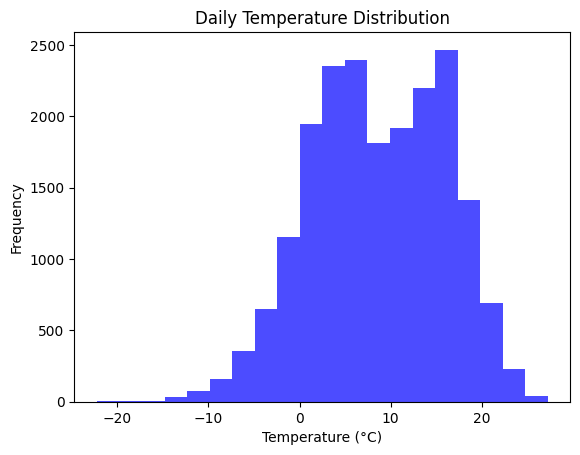

In [636]:


temperature_data = data['Snittemperatur']

# Create a histogram
plt.hist(temperature_data, bins=20, color='blue', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Daily Temperature Distribution')

plt.show()

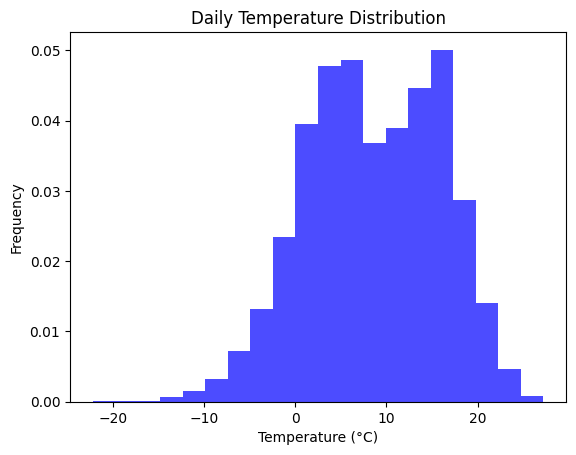

In [637]:
temperature_data = data['Snittemperatur']

# Create a histogram
plt.hist(temperature_data, bins=20, color='blue', alpha=0.7, density = True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Daily Temperature Distribution')

plt.show()

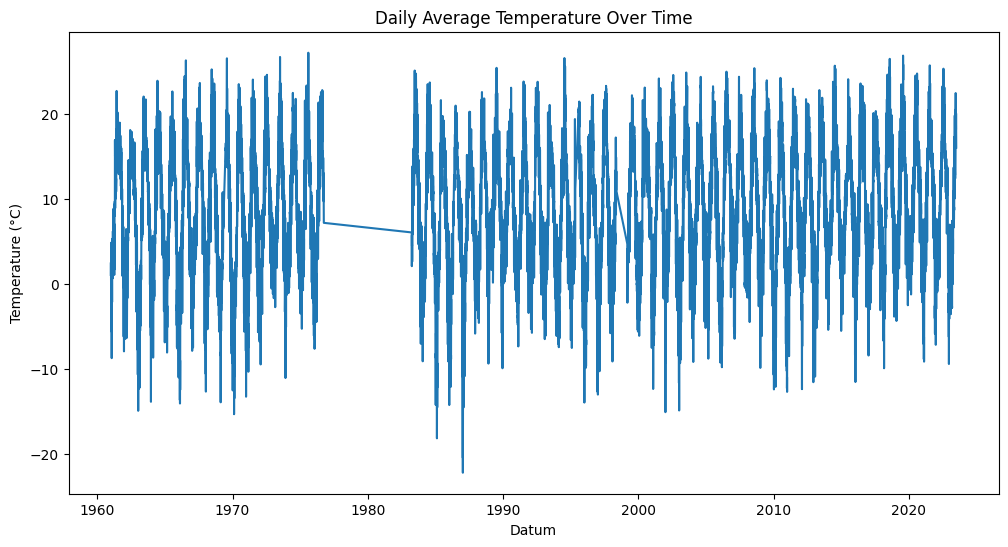

In [638]:

plt.figure(figsize=(12, 6))
plt.plot(data['Datum'], data['Snittemperatur'])
plt.xlabel('Datum')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Over Time')
plt.show()

In [639]:
data.head()

,Datum,Kvalitet,Snittemperatur,Month
0,1961-01-01,G,1.07,1961-01-01
1,1961-01-02,G,2.27,1961-01-01
2,1961-01-03,G,2.27,1961-01-01
3,1961-01-04,G,2.53,1961-01-01
4,1961-01-05,G,2.13,1961-01-01


attempt to insert in save data in the missing gothenburg data, dates between 1976-10-01 & 1983-03-30, and? 

In [640]:
noentries_subset = data[(data['Datum'] >= '1976-10-01') & (data['Datum'] <= '1983-03-30')]



In [641]:
noentries_subset

,Datum,Kvalitet,Snittemperatur,Month


In [660]:
# noentries_subset_2 = data[(data['Datum'] >= '1998-01-01') & (data['Datum'] <= '1999-03-07')]
noentries_subset_2 = data[(data['Datum'] >= '1998-05-15') & (data['Datum'] <= '1999-03-08')]
noentries_subset_2

,Datum,Snittemperatur
13433,1998-05-15,11.00
13434,1999-03-08,4.71


In [642]:
# import save data
df_sav = pd.read_csv('/Users/mstee/Documents/School/projectwork/data/smhi_temp_data_save.csv', usecols=[0, 1, 2, 3], header=6, sep=';')

In [644]:
df_sav

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
0,1944-01-01,07:00:00,1.6,G
1,1944-01-01,13:00:00,3.8,G
2,1944-01-01,18:00:00,4.2,G
3,1944-01-02,07:00:00,0.6,G
4,1944-01-02,13:00:00,3.8,G
...,...,...,...,...
435387,2006-12-05,09:00:00,9.4,G
435388,2006-12-05,10:00:00,10.1,Y
435389,2006-12-05,11:00:00,10.8,Y
435390,2006-12-05,12:00:00,10.9,G


In [645]:
import pandas as pd

# Assuming your DataFrame is called df_sav
# Convert the "Datum" column to a datetime object
df_sav['Datum'] = pd.to_datetime(df_sav['Datum'])

# Group the data by date and calculate the daily mean temperature
df_sav = df_sav.groupby('Datum')['Lufttemperatur'].mean().reset_index()

# # Rename the columns in the new DataFrame
df_sav = df_sav.rename(columns={'Datum': 'Datum', 'Lufttemperatur': 'Snittemperatur'})

# # Print the resulting DataFrame
# print(daily_temp)
df_sav

,Datum,Snittemperatur
0,1944-01-01,3.200000
1,1944-01-02,3.600000
2,1944-01-03,2.800000
3,1944-01-04,-4.466667
4,1944-01-05,-1.400000
...,...,...
22980,2006-12-01,8.033333
22981,2006-12-02,8.808333
22982,2006-12-03,8.112500
22983,2006-12-04,8.566667


In [646]:
#inspect Save data set for presence of the dates missing for hte GBG station data set 
# data[(data['Datum'] >= '1976-10-01') & (data['Datum'] <= '1983-03-30')]
target_sav_dates = df_sav[(df_sav['Datum'] >= '1976-10-01') & (df_sav['Datum'] <= '1983-03-30')]
target_sav_dates

,Datum,Snittemperatur
11962,1976-10-01,7.595833
11963,1976-10-02,7.175000
11964,1976-10-03,8.583333
11965,1976-10-04,11.037500
11966,1976-10-05,9.804167
...,...,...
14329,1983-03-26,1.616667
14330,1983-03-27,2.237500
14331,1983-03-28,1.816667
14332,1983-03-29,1.912500


In [647]:
columns_to_drop = ['Month', 'Kvalitet']
data = data.drop(columns=columns_to_drop)

In [648]:


# Make sure the "Datum" column in both dataframes is of datetime type
data['Datum'] = pd.to_datetime(data['Datum'])
df_sav['Datum'] = pd.to_datetime(df_sav['Datum'])

# Filter the rows from df_sav that match your date criteria
filtered_df_sav = df_sav[(df_sav['Datum'] >= '1976-10-01') & (df_sav['Datum'] <= '1983-03-30')]
filtered_df_sav_2 = df_sav[]
# Now, you can concatenate the filtered_df_sav with data
data = pd.concat([data, filtered_df_sav], ignore_index=True)

# Sort the resulting dataframe by the "Datum" column
data = data.sort_values(by='Datum')

# Reset the index
data = data.reset_index(drop=True)


In [649]:
data 

,Datum,Snittemperatur
0,1961-01-01,1.07
1,1961-01-02,2.27
2,1961-01-03,2.27
3,1961-01-04,2.53
4,1961-01-05,2.13
...,...,...
22281,2023-06-27,18.18
22282,2023-06-28,19.72
22283,2023-06-29,19.22
22284,2023-06-30,17.40


Time series analysis 

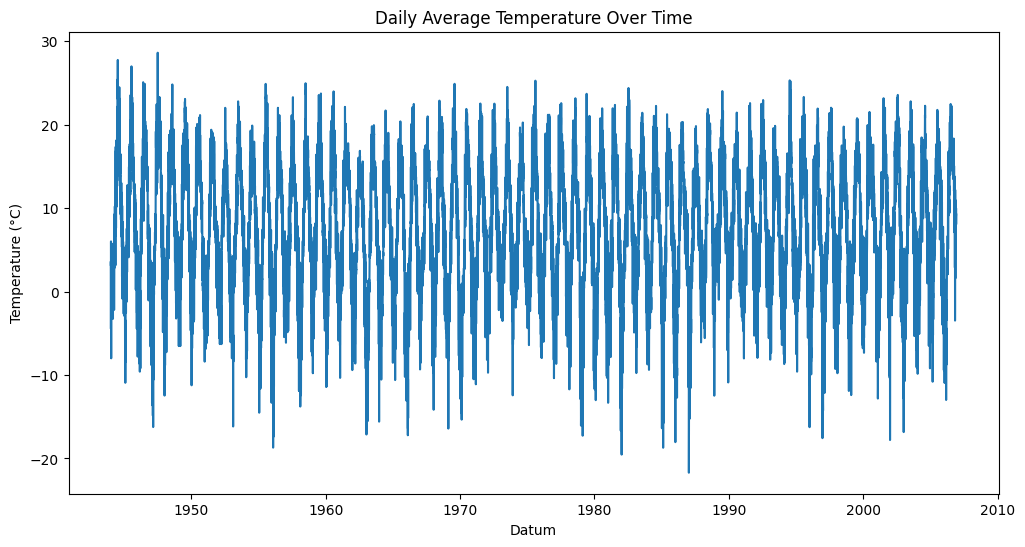

In [667]:

plt.figure(figsize=(12, 6))
plt.plot(df_sav['Datum'], df_sav['Snittemperatur'])
plt.xlabel('Datum')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Over Time')
plt.show()

In [400]:
decomposition = seasonal_decompose(subset['Snittemperatur'], model='additive')
trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None